In [48]:
import numpy as np
import pandas as pd
import requests
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [49]:
df =  pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [50]:
df.shape

(16598, 11)

#### DATA PREPROCESSING

In [51]:
df.drop(['Rank'],axis=1,inplace=True)

In [52]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [53]:
df1 = df.copy()

#### Check For The Duplicate

In [54]:
df.duplicated().sum()

1

In [55]:
df.drop_duplicates(inplace=True)

In [56]:
df.shape

(16597, 10)

In [57]:
df.sample(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1228,Dead Space 2,X360,2011.0,Shooter,Electronic Arts,0.94,0.45,0.00,0.13,1.52
13151,Need for Speed Carbon,PC,2006.0,Racing,Electronic Arts,0.00,0.04,0.00,0.01,0.05
10307,X-Men: Destiny,Wii,2011.0,Action,Activision,0.08,0.02,0.00,0.01,0.11
12585,3D Lemmings,PS,1995.0,Puzzle,Psygnosis,0.03,0.02,0.00,0.00,0.06
16446,Junjou Romanchika: Koi no Doki Doki Daisakusen,PS2,2008.0,Adventure,Marvelous Interactive,0.00,0.00,0.01,0.00,0.01
3073,Napoleon: Total War,PC,2010.0,Strategy,Sega,0.02,0.52,0.00,0.12,0.66
7463,Marvel Super Hero Squad: Comic Combat,PS3,2011.0,Action,THQ,0.11,0.07,0.00,0.03,0.21
8896,Strawberry Shortcake: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.11,0.04,0.00,0.00,0.15
1267,Final Fantasy: Crystal Chronicles,GC,2003.0,Role-Playing,Nintendo,0.72,0.38,0.36,0.04,1.49
16465,Help Wanted: 50 Wacky Jobs (jp sales),Wii,2008.0,Simulation,Hudson Soft,0.00,0.01,0.01,0.00,0.01


#### Checking for the null values 

In [58]:
df.isnull().sum()

Name              0
Platform          0
Year            270
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [59]:
df = df.dropna()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16291 non-null  object 
 1   Platform      16291 non-null  object 
 2   Year          16291 non-null  float64
 3   Genre         16291 non-null  object 
 4   Publisher     16291 non-null  object 
 5   NA_Sales      16291 non-null  float64
 6   EU_Sales      16291 non-null  float64
 7   JP_Sales      16291 non-null  float64
 8   Other_Sales   16291 non-null  float64
 9   Global_Sales  16291 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


#### Converting Year into INT

In [61]:
df["Year"] = df['Year'].astype('int')

In [62]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#### Checking For the outliers

In [63]:
## Check for the lower end 
df.describe(percentiles = [0.01,0.02,0.03,0.04,0.05]).T

,count,mean,std,min,1%,2%,3%,4%,5%,50%,max
Year,16291.0,2006.405561,5.832412,1980.00,1987.00,1993.00,1995.00,1995.00,1996.00,2007.00,2020.00
NA_Sales,16291.0,0.265647,0.822432,0.00,0.00,0.00,0.00,0.00,0.00,0.08,41.49
EU_Sales,16291.0,0.147731,0.509303,0.00,0.00,0.00,0.00,0.00,0.00,0.02,29.02
JP_Sales,16291.0,0.078833,0.311879,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.22
Other_Sales,16291.0,0.048426,0.190083,0.00,0.00,0.00,0.00,0.00,0.00,0.01,10.57
Global_Sales,16291.0,0.540910,1.567345,0.01,0.01,0.01,0.01,0.02,0.02,0.17,82.74


In [64]:
## Check for the upper end 
df.describe(percentiles = [0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,50%,95%,96%,97%,98%,99%,max
Year,16291.0,2006.405561,5.832412,1980.00,2007.00,2015.00,2015.000,2015.000,2016.000,2016.000,2020.00
NA_Sales,16291.0,0.265647,0.822432,0.00,0.08,1.07,1.260,1.540,1.980,2.820,41.49
EU_Sales,16291.0,0.147731,0.509303,0.00,0.02,0.63,0.764,0.970,1.240,1.940,29.02
JP_Sales,16291.0,0.078833,0.311879,0.00,0.00,0.36,0.450,0.560,0.800,1.270,10.22
Other_Sales,16291.0,0.048426,0.190083,0.00,0.01,0.20,0.230,0.290,0.390,0.651,10.57
Global_Sales,16291.0,0.540910,1.567345,0.01,0.17,2.05,2.380,2.903,3.762,5.472,82.74


In [65]:
upper_end = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']

In [66]:
def outlier_treatment_le(x):
    x = x.clip(upper = x.quantile(0.99))
    return x

In [67]:
df[upper_end] = df[upper_end].apply(outlier_treatment_le)

In [68]:
df.describe(percentiles = [0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,50%,95%,96%,97%,98%,99%,max
Year,16291.0,2006.405561,5.832412,1980.00,2007.00,2015.00,2015.000,2015.000,2016.000,2016.0000,2020.000
NA_Sales,16291.0,0.236275,0.451430,0.00,0.08,1.07,1.260,1.540,1.980,2.8200,2.820
EU_Sales,16291.0,0.130516,0.296386,0.00,0.02,0.63,0.764,0.970,1.240,1.9400,1.940
JP_Sales,16291.0,0.066762,0.187655,0.00,0.00,0.36,0.450,0.560,0.800,1.2700,1.270
Other_Sales,16291.0,0.041756,0.095304,0.00,0.01,0.20,0.230,0.290,0.390,0.6501,0.651
Global_Sales,16291.0,0.481217,0.863839,0.01,0.17,2.05,2.380,2.903,3.762,5.4702,5.472


In [69]:
# df = df[df['Global_Sales'] < 0.49]

In [70]:
num_cols = df.dtypes[df.dtypes!='object'].index

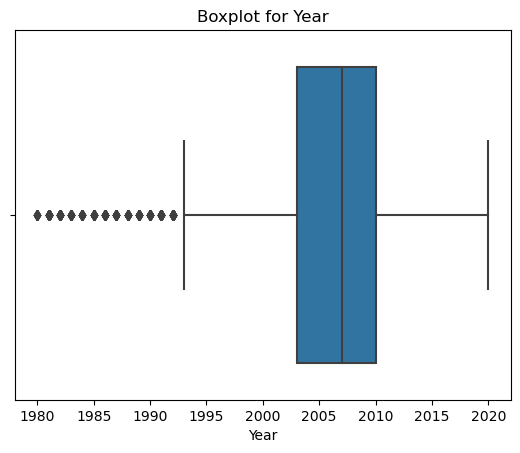

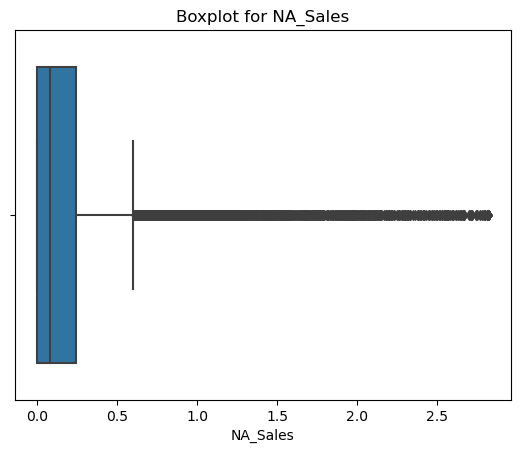

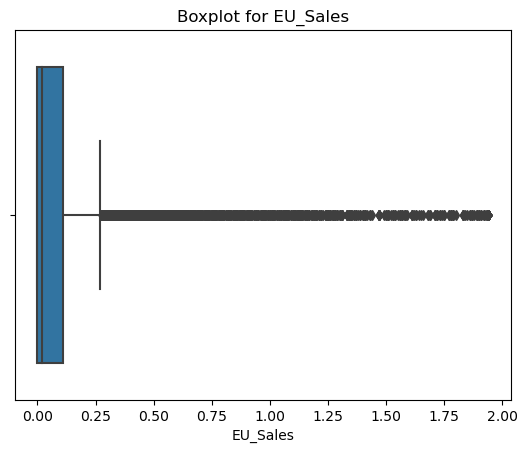

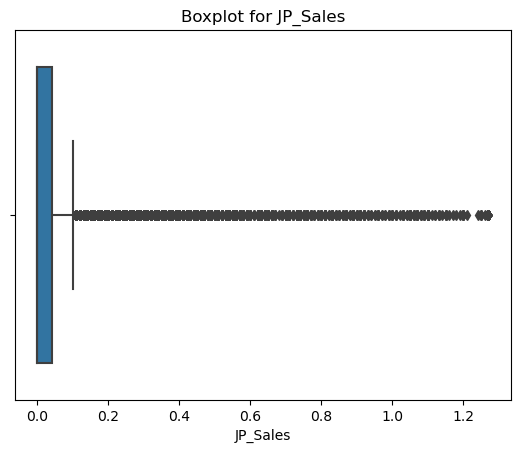

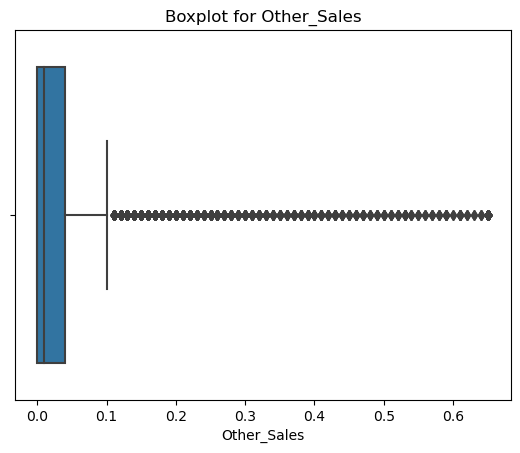

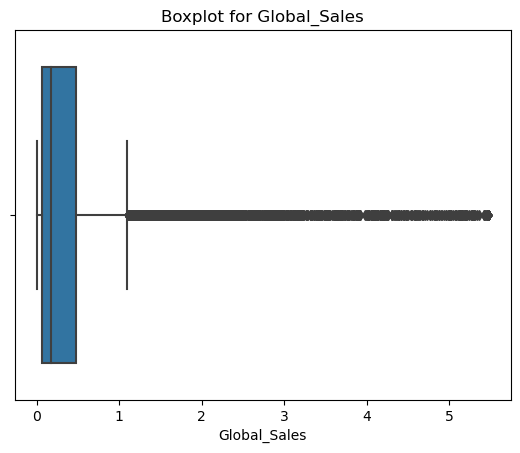

In [71]:
for i in num_cols:
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

#### Encoding Cat Col 

In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,2.82,1.94,1.27,0.651,5.472
1,Super Mario Bros.,NES,1985,Platform,Nintendo,2.82,1.94,1.27,0.651,5.472
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,2.82,1.94,1.27,0.651,5.472
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,2.82,1.94,1.27,0.651,5.472
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,2.82,1.94,1.27,0.651,5.472


In [74]:
columns =['Name','Platform','Year','Genre','Publisher','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'] 

In [75]:
df[columns] = df[columns].apply(LabelEncoder().fit_transform)

In [76]:
df.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,10849,26,26,10,359,268,184,125,66,470
1,9201,11,5,4,359,268,184,125,66,470
2,5493,26,28,6,359,268,184,125,66,470
3,10851,26,29,10,359,268,184,125,66,470
4,7247,5,16,7,359,268,184,125,66,470
5,9581,5,9,5,359,268,184,125,58,470
6,6632,4,26,4,359,268,184,125,66,470
7,10847,26,26,3,359,268,184,125,66,470
8,6635,26,29,4,359,268,184,125,66,470
9,2541,11,4,8,359,268,63,28,47,470


#### DATA SPLITING X AND Y

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [79]:
x.shape

(16291, 9)

In [80]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.30)

In [81]:
x_train.shape

(11403, 9)

In [82]:
x_train

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3400,7889,16,28,3,292,29,23,0,8
1907,10151,16,24,8,524,64,34,0,10
629,3103,23,12,7,465,0,0,125,2
8244,9660,17,31,0,112,7,7,1,3
1352,10355,15,19,10,138,79,54,0,9
...,...,...,...,...,...,...,...,...,...
13655,7116,19,31,7,362,0,0,4,0
5474,2060,29,23,8,137,25,7,0,1
870,10169,28,26,8,524,109,65,2,20
16087,5426,26,28,10,492,0,0,1,0


In [83]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(11403, 9)
(4888, 9)
(11403,)
(4888,)


#### Scaling with  RobustScaler 

In [84]:
from sklearn.preprocessing import RobustScaler

In [85]:
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

### OLS

In [86]:
import statsmodels.api as sm


In [87]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(16291, 9)
(16291,)


In [88]:
x = sm.add_constant(x)
result = sm.OLS(y, x).fit()
 
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Global_Sales   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                 6.575e+04
Date:                Sat, 26 Aug 2023   Prob (F-statistic):               0.00
Time:                        22:00:34   Log-Likelihood:                -64996.
No. Observations:               16291   AIC:                         1.300e+05
Df Residuals:                   16281   BIC:                         1.301e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.5805      0.609      9.171      

In [89]:
print(result.rsquared_adj)
print(result.rsquared)

0.9732084056749563
0.9732232076607712


In [90]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [91]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2 Score',r2s)
    
def mscore(model):
    print('Train Score',model.score(x_train,y_train))  # Train R2 Score
    print('Test Score',model.score(x_test,y_test))     # Test R2 Score

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
lr1 = LinearRegression()
lr1.fit(x_train,y_train)  #

LinearRegression()

In [94]:
mscore(lr1)

Train Score 0.9716461790011927
Test Score 0.9767003556527282


In [95]:
ypred_lr1 =  lr1.predict(x_test)
eval_model(y_test,ypred_lr1)

MAE 3.717171008258067
MSE 153.90624748656307
RMSE 12.405895674499407
R2 Score 0.9767003556527282


In [97]:
ypred_lr1 = ypred_lr1
res_df = pd.DataFrame({'Actual_y_test':y_test,'Pred':ypred_lr1})
res_df.head(20)

,Actual_y_test,Pred
3527,56,54.559646
12216,6,5.632264
7940,18,18.229288
3030,66,63.347323
7144,21,21.544689
10044,10,12.239690
8444,16,16.058884
9539,12,14.621889
15683,1,3.894367
7440,20,21.085807
